In [3]:
import pandas as pd
from scipy import stats
import numpy as np

import seaborn as sns
from sklearn import datasets
from matplotlib import pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

### Первая часть

In [4]:
# загружаем датасет
data = datasets.load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

In [5]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Посчитать руками статистики $\bar{X}, s^2, \mu, MODE, X_{0.75} - X_{0.25}$ для поля mean symmetry

In [6]:
# your solution is here
d = list(df['mean symmetry'])
mean = sum(d)/len(d)
var = (1/len(d)*sum([(x - mean)**2 for x in d]))**0.5
median = sorted(d)[len(d)//2]
maxcount = max(list(map(d.count, d)))
moda = list(set(filter(lambda x: d.count(x) == maxcount, d)))
x025 = sorted(d)[len(d)//4]
x075 = sorted(d)[len(d)*3//4]
print('mean, var, median, mu, x025, x075 : ', mean, var, median, x025, x075)
print('moda : ', moda)


mean, var, median, mu, x025, x075 :  0.181161862917399 0.027390180864268525 0.1792 0.1619 0.1957
moda :  [0.1769, 0.1714, 0.1717, 0.1601, 0.1893]


In [7]:
df['mean symmetry'].describe()

count    569.000000
mean       0.181162
std        0.027414
min        0.106000
25%        0.161900
50%        0.179200
75%        0.195700
max        0.304000
Name: mean symmetry, dtype: float64

#### С помощью seaborn найти пару наиболее зависимых и независимых признаков среди первых 5

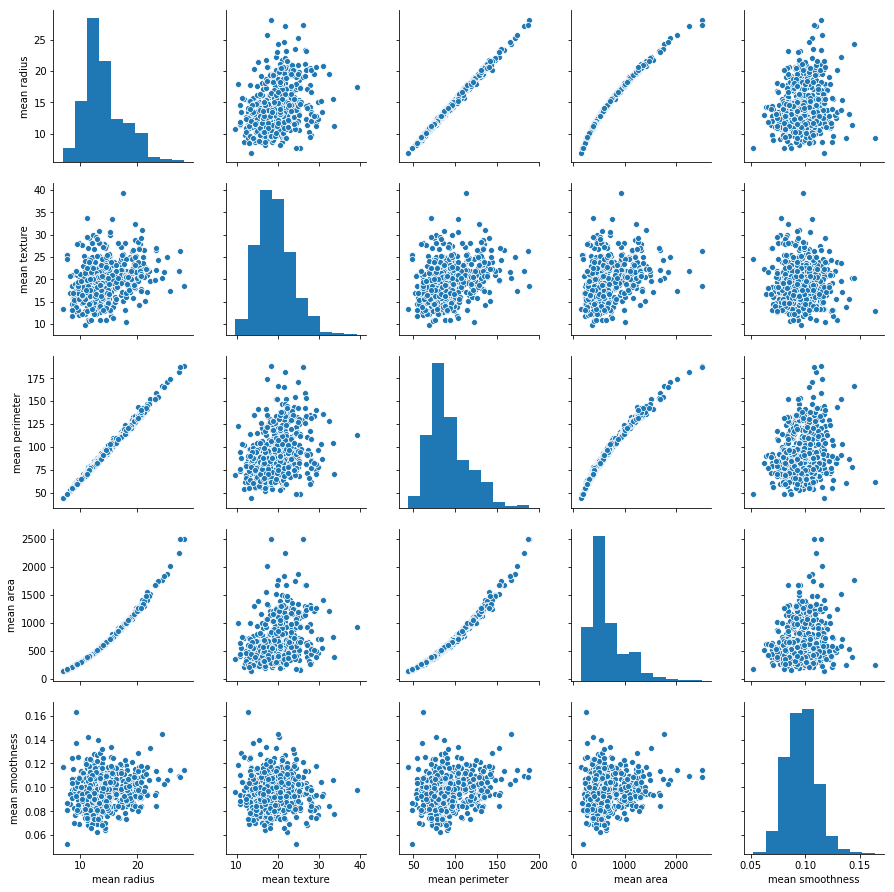

In [8]:
sns.pairplot(df, vars=['mean radius','mean texture','mean perimeter','mean area','mean smoothness'])

In [9]:
# Наиболее зависимые пары:
# mean radius <-> mean area, mean radius <-> mean perimeter, mean area <-> mean perimeter

#### С помощью матрицы корреляций найти пару наиболее зависимых и независимых признаков среди первых 5

In [10]:
corr = df[['mean radius','mean texture','mean perimeter','mean area','mean smoothness']].corr()
corr

,mean radius,mean texture,mean perimeter,mean area,mean smoothness
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278
mean area,0.987357,0.321086,0.986507,1.000000,0.177028
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000


In [11]:
# Наиболее зависимая пара: mean radius <-> mean perimeter

#### Проверить найденные пары t-тестом

In [12]:
stats.ttest_ind(df['mean radius'],df['mean perimeter']) 
#Если честно, то я не понял как можно использовать t-test для проверки зависимости 2-х непрерывано распределенных параметров
# Когда один параметр имеет несколько дискретных значений, то все понятно, берем набор для одного значения, и набор для другого,
# сравниваем матож, если они равны, то зависимости нет...

Ttest_indResult(statistic=-75.62417662792113, pvalue=0.0)

#### Проверить руками гипотезу $H_0: M_{mean\ compactness} = 0$ 

In [13]:
d = np.array(list(df['mean compactness']))
n = len(d)

In [14]:
mean = d.mean()
s = d.var()**.5
print('n, mean, s : ', n, mean, s)
se = s/(n)**0.5
mean, se
print('se : ', se)
z = (mean - 0)/se
print('z : ', z)
#x1 = mean - 2*se
#x2 = mean + 2*se
#x1, x2

n, mean, s :  569 0.10434098418277679 0.05276632912535515
se :  0.00221207959053862
z :  47.168729655595605


In [15]:
# z > 1,96, значит гипотезу отвергаем

#### Нарисовать распределение признака worst texture с помощью
- диаграммы
- qq-plot
- эмпирическая ф.р.

In [16]:
d = np.array(list(df['worst texture']))

Text(0.5,1,'Функция распределения значений')

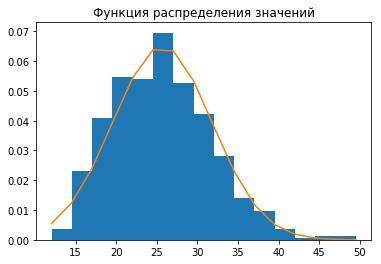

In [17]:
n, bins, patches = plt.hist(d, 15, density=1)
mu = np.mean(d)
sigma = np.std(d)
plt.plot(bins, stats.norm.pdf(bins, mu, sigma))
plt.title('Функция распределения значений')


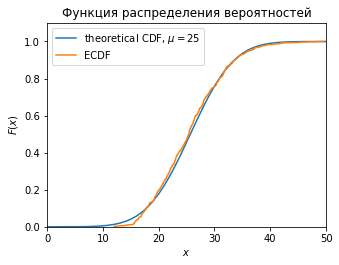

In [18]:
fig, ax = plt.subplots(figsize=(5, 3.75))
dist = stats.norm(mu, sigma)
x = np.arange(0, 569)
plt.plot(x, dist.cdf(x), label=r'theoretical CDF, $\mu=%i$' % mu)
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(d)
plt.plot(ecdf.x, ecdf.y, label='ECDF' % mu)


plt.xlim(0, 50)
plt.ylim(0, 1.1)

plt.xlabel('$x$')
plt.ylabel(r'$F(x)$')
plt.title('Функция распределения вероятностей')

plt.legend()
plt.show()

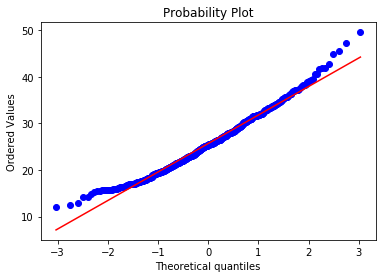

In [19]:
res = stats.probplot(d, plot=plt)

### Вторая часть

Сгенерируйте выборку из пуассоновского распределения $Pois(\theta)$ для $\theta = 2$, записав
ее в виде матрицы ${\{X_{ij}\}}_{i=1...N, j=1...K}$ где $N= 1000$ и $K = 10000$.

Выполните следующую процедуру для всех $n=2, ...N$. Для всех $j = 1...K$ по выборке $\{X_{ij}\}_{i=1...n}$ оцените параметр $\theta$ с помощью оценки выборочного среднего $\hat{\theta_j^n}$ и оценки $\tilde{\theta}_j^n = \frac{1}{n-1} \sum_{i=1}^n\left(X_{ij} - \frac1n \sum_{i=1}^n X_{ij}\right)^2$. По выборкам $\{\hat{\theta}_j^n\}_{j=1...K}$ и $\{\tilde{\theta}_j^n\}_{j=1...K}$ для этих двух типов оценок найдите оценки дисперсий $\hat{\sigma}_n$ $\tilde{\sigma}_n$

Нарисуйте график оценок дисперсий в зависимости от $n$. При необходимости не забывайте выставлять значение plt.ylim. Сделайте выводы. **Постарайтесь решить эту задачу без циклов, используя только функции библиотеки numpy**

In [40]:
mu = 2
Z = stats.poisson.rvs(mu, size=101*1001).reshape(101,1001)


In [41]:
Z[4][1:5]

array([1, 2, 3, 3])

In [49]:
K = len(Z)-1
N = len(Z[0])-1
print(N, K)
rm = np.zeros(N+1)
rs = np.zeros(N+1)
for j in range(1, N+1):
    rm[j] = np.var([np.mean(Z[i][1:j+1]) for i in range(1, K+1)])
    rs[j] = np.var([np.std(Z[i][1:j+1]) for i in range(1, K+1)])
rm = rm[1:N+1]    
rs = rs[1:N+1]    
print(rm)
print(rs)

1000 100
[1.75790000e+00 9.09100000e-01 6.00266667e-01 4.67068750e-01
 3.44000000e-01 2.95763889e-01 2.26008163e-01 1.95904688e-01
 1.67964198e-01 1.32971000e-01 1.30978512e-01 1.24507639e-01
 1.15154438e-01 1.09662755e-01 1.09777778e-01 1.05954687e-01
 9.86058824e-02 9.37271605e-02 8.85041551e-02 8.71187500e-02
 7.32145125e-02 7.12636364e-02 6.83438563e-02 6.38838542e-02
 6.35640000e-02 6.41769231e-02 6.20389575e-02 6.05014031e-02
 6.32602854e-02 5.79284444e-02 5.63033299e-02 5.75659180e-02
 5.57851240e-02 5.46521626e-02 5.14915102e-02 4.94030864e-02
 4.78322863e-02 4.54761080e-02 4.52107824e-02 4.42186875e-02
 4.41914932e-02 4.42686508e-02 4.37034072e-02 4.42946281e-02
 4.52446420e-02 4.63638469e-02 4.43702580e-02 4.34027778e-02
 4.24533111e-02 4.16510000e-02 3.86357555e-02 3.80983358e-02
 3.89691705e-02 3.69072702e-02 3.56468099e-02 3.68870855e-02
 3.57666667e-02 3.40476813e-02 3.46008618e-02 3.45243056e-02
 3.25293201e-02 3.25132934e-02 3.10804737e-02 3.12860107e-02
 3.23136331e-02

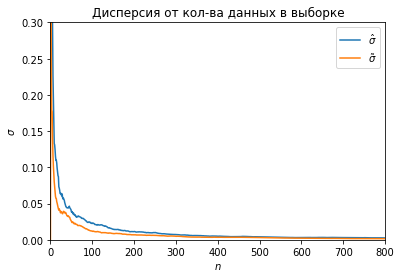

In [62]:
x = np.arange(1, N+1)
plt.plot(x, rm, label=r'$\hat{\sigma}$')
plt.plot(x, rs, label=r'$\tilde{\sigma}$')


plt.xlim(1, 800)
plt.ylim(0, .3)

plt.xlabel('$n$')
plt.ylabel(r'$\sigma$')
plt.title('Дисперсия от кол-ва данных в выборке')

plt.legend()
plt.show()